In [18]:
import numpy as np
from collections import deque
import matplotlib.pyplot as plt


%matplotlib inline
%config InlineBackend.figure_format='retina'

In [19]:
fs = 30000

times = np.load('../results/dohoung_s1/output/spike_times.npy')/fs
clusters = np.load('../results/dohoung_s1/output/spike_clusters.npy')

n_clusters = np.unique(clusters).size
n = times.shape[0]

In [20]:
tmplt_len = 61/fs
window = deque()
window_counts = np.zeros(n_clusters)
overlap = np.zeros((n_clusters, n_clusters))

for i in np.arange(n):
    window.append(i)

    # Boot spikes outside window
    while (times[i] - times[window[0]]) > tmplt_len:
        old = window.popleft()
        window_counts[clusters[old]] -= 1
        
    # update overlap row of new spike
    overlap[clusters[i], :] += window_counts
        
    # update overlap rows for pre-existing spikes
    overlap[:, clusters[i]] += window_counts.T
    
    # for j in np.arange(n_clusters):
    #     overlap[j, clusters[i]] += window_counts[j]
    
    # update window counts
    window_counts[clusters[i]] += 1    

In [21]:
# count number of spikes for each cluster
clust_counts = np.zeros(n_clusters)

for i in np.arange(n):
    clust_counts[clusters[i]] += 1
    
    
overlap_norm = overlap.copy()
# normalize overlap by spikes in cluster
for i in np.arange(n_clusters):
    overlap_norm[i, :] /= clust_counts[i]

In [22]:
def find_times(times, clusters, cluster):
    ret = []
    for i in range(times.shape[0]):
        if clusters[i] == cluster:
            ret.append(times[i])
    return ret

(array([81., 30., 53.,  8.,  7., 17.,  1.,  2.,  7.,  1.,  1.,  5.,  6.,
         9., 16.,  3.,  0.,  0.,  0.,  1.]),
 array([0.20022353, 0.25687902, 0.31353451, 0.37019   , 0.42684549,
        0.48350098, 0.54015647, 0.59681196, 0.65346745, 0.71012294,
        0.76677843, 0.82343392, 0.88008941, 0.9367449 , 0.99340039,
        1.05005588, 1.10671137, 1.16336686, 1.22002235, 1.27667784,
        1.33333333]),
 <BarContainer object of 20 artists>)

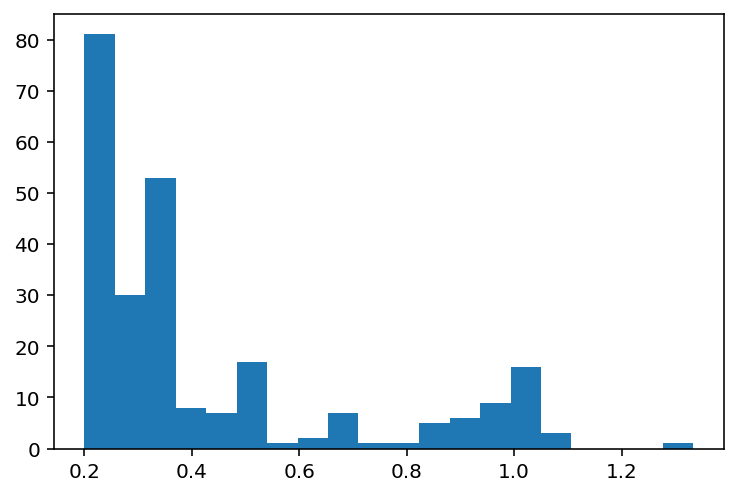

In [23]:
plt.hist(overlap_norm.flatten()[overlap_norm.flatten() > 0.2], bins=20)

In [24]:
x = []
y = []
for i in np.arange(n_clusters):
    for j in np.arange(i+1, n_clusters):
        x.append(overlap_norm[i,j])
        y.append(overlap_norm[j,i])

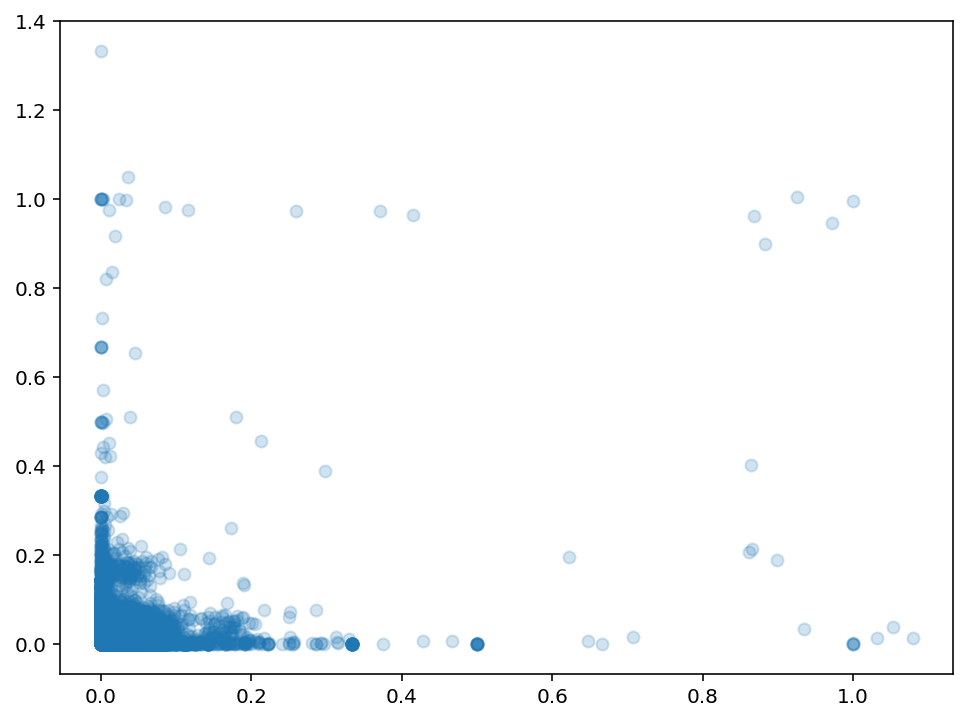

In [37]:
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha = 0.2)